In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Load data
file_path = "../CleanData/total_dataset.csv"
#total_dataset
df = pd.read_csv(file_path)
df = df.drop_duplicates()
df

,mp_id,Formula,IPF,Density,E_above_Hull,G_VRH,K_VRH,Elastic_Anisotropy,poisson_ratio,Y_Modulus,...,Pu,Am,Cm,Bk,Cf,Es,Fm,Md,No,Lr
0,mp-1021323,LiC12,0.035508,2.019464,0.0,98.0,125.0,141.62,0.19,233.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,mp-1021328,H4C,0.001839,0.433068,0.0,0.0,1.0,13.33,0.30,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,mp-10721,Ti2C,0.131230,4.439769,0.0,78.0,139.0,1.07,0.26,196.56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,mp-1086,TaC,0.107626,14.234281,0.0,215.0,324.0,0.30,0.23,528.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,mp-1164,ThC,0.140426,10.558534,0.0,73.0,139.0,0.04,0.28,186.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2954,mp-865924,LiZrAu2,0.218135,11.153925,0.0,11.0,102.0,1.79,0.45,31.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2955,mp-8891,K2Zr(BO3)2,0.558271,3.208382,0.0,37.0,74.0,4.57,0.29,95.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2956,mp-9318,KZrCuSe3,0.218962,4.780798,0.0,18.0,23.0,4.50,0.19,42.84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2957,mp-9929,ZrCuSiAs,0.104449,6.538644,0.0,79.0,137.0,0.11,0.26,199.08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.drop( df[ df['Y_Modulus'] < 0 ].index , inplace=True)
df

,mp_id,Formula,IPF,Density,E_above_Hull,G_VRH,K_VRH,Elastic_Anisotropy,poisson_ratio,Y_Modulus,...,Pu,Am,Cm,Bk,Cf,Es,Fm,Md,No,Lr
0,mp-1021323,LiC12,0.035508,2.019464,0.0,98.0,125.0,141.62,0.19,233.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,mp-1021328,H4C,0.001839,0.433068,0.0,0.0,1.0,13.33,0.30,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,mp-10721,Ti2C,0.131230,4.439769,0.0,78.0,139.0,1.07,0.26,196.56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,mp-1086,TaC,0.107626,14.234281,0.0,215.0,324.0,0.30,0.23,528.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,mp-1164,ThC,0.140426,10.558534,0.0,73.0,139.0,0.04,0.28,186.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2954,mp-865924,LiZrAu2,0.218135,11.153925,0.0,11.0,102.0,1.79,0.45,31.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2955,mp-8891,K2Zr(BO3)2,0.558271,3.208382,0.0,37.0,74.0,4.57,0.29,95.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2956,mp-9318,KZrCuSe3,0.218962,4.780798,0.0,18.0,23.0,4.50,0.19,42.84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2957,mp-9929,ZrCuSiAs,0.104449,6.538644,0.0,79.0,137.0,0.11,0.26,199.08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


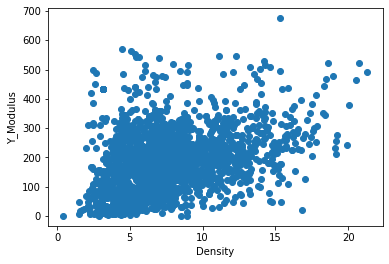

In [4]:
plt.scatter(df.Density, df.Y_Modulus)
plt.xlabel('Density')
plt.ylabel('Y_Modulus')
plt.show()

In [5]:
X = df.Density.values.reshape(-1, 1)

In [6]:
X[:5]

array([[ 2.01946386],
       [ 0.43306825],
       [ 4.43976917],
       [14.23428075],
       [10.55853376]])

In [7]:
X.shape

(2136, 1)

In [8]:
y = df.Y_Modulus

In [9]:
model = LinearRegression()

In [10]:
model.fit(X, y)

LinearRegression()

In [11]:
y_pred = model.predict(X)
print(y_pred.shape)

(2136,)


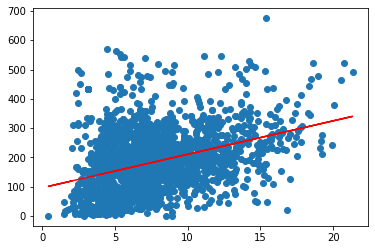

In [12]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [13]:
print(model.coef_)
print(model.intercept_)

[11.43416787]
96.0700246092071


In [14]:
reg = model.fit(X, y)
reg.score(X, y)

0.13610235130579917

In [15]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.13610235130579917

In [16]:
R2 = reg.score(X, y)

In [18]:
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot

plotly.offline.init_notebook_mode(connected=True)
layout_test = go.Layout(title= "All compounds", hovermode= 'closest',
                  font = dict(family='Times New Roman',size=36),
                  xaxis= dict(title= 'Density [g/cm<sup>3</sup>]',zeroline= False, gridwidth= 2), #To change range put command inside xaxis dictionary after gridwidth range=[-XX,XX]
                  yaxis= dict(title= "Young's Modulus [GPa]",zeroline= False, gridwidth= 2,range=[0,700]), #To change range put command inside yaxis dictionary after gridwidth range=[-YY,YY]
                  height = 800,
                  width = 800,
    showlegend= False           
)

#Scatter plot of collected data. Use df_oxide_all dataframe. df_oxide_all.Density will pull density column. Could change Density or IPF to Molar Volume or simply volume if you wanted.
trace_test = go.Scatter(x = df.Density, y = df.Y_Modulus, mode = 'markers', text = df.Formula,
                           marker=dict(size=12, color=(df['poisson_ratio']),
                               colorbar = dict(title={ 'text': "Poisson Ratio", 
                                                    'font': {'family':'Georgia', 'size': 18}},  
                                             tickfont={'family':'Georgia', 'size': 16 })), 
                        name = 'All Queries')

predictions = y_pred.reshape(1,-1).tolist()[0]
full_x_list =X.reshape(1,-1).tolist()[0]

prediction = go.Scatter(x = full_x_list, y = predictions, mode = 'lines+text', 
                            line = dict(color = "blue", width = 5),name= "Model" )

import plotly.express as px
data_test = [trace_test, prediction]
fig_test = go.Figure(data_test, layout=layout_test)
fig_test.add_annotation(
            x=15,
            y=500,
            text= f"Linear regression model:<br>Y={model.coef_[0]:,.3f}X+{model.intercept_:,.3f}<br>R<sup>2</sup> = {R2:,.3f}", 
            font=dict(
                color="blue",
                size=36
            )
            )
iplot(fig_test)